In [16]:
import numpy as np
import pandas as pd

import tensorflow as tf

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.models import load_model

from sklearn.model_selection import train_test_split

import matplotlib as mpl
import matplotlib.pyplot as plt

In [91]:
# データセット読み込み
dataset = pd.read_csv('tictactoe.csv')

dataset

,top-left-square,top-middle-square,top-right-square,middle-left-square,middle-middle-square,middle-right-square,bottom-left-square,bottom-middle-square,bottom-right-square,result
0,-1,-1,-1,-1,1,1,0,1,1,-1
1,-1,-1,-1,-1,1,1,1,0,1,-1
2,-1,-1,-1,-1,1,1,1,1,0,-1
3,-1,-1,-1,0,0,1,0,1,1,-1
4,-1,-1,-1,0,0,1,1,0,1,-1
...,...,...,...,...,...,...,...,...,...,...
5885,1,1,1,1,-1,0,-1,0,-1,1
5886,1,1,1,1,-1,0,0,-1,-1,1
5887,1,1,1,1,0,-1,-1,-1,0,1
5888,1,1,1,1,0,-1,-1,0,-1,1


In [116]:
# データを入力とラベルに分割
x = dataset.iloc[:, 0:9].values
y = dataset.iloc[:, 9].values

print(x.shape)
print(y.shape)

(5890, 9)
(5890,)


In [117]:
# ラベルをone-hot-encoding形式に変換
y = y + 1   # ラベルを(-1 ~ 1)→(0 ~ 2)に変更
y = np_utils.to_categorical(y)

y.shape

(5890, 3)

In [118]:
# 学習データとテストデータに分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4123, 9)
(4123, 3)
(1767, 9)
(1767, 3)


In [119]:
# モデル構築
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(9, )))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['accuracy'])

In [120]:
# 学習
history = model.fit(x_train, y_train, epochs=256, batch_size=1024, verbose=0)

In [121]:
# モデル評価
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.93


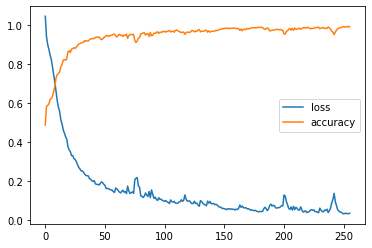

In [122]:
results = pd.DataFrame(history.history)
results.plot();

In [123]:
x_pred = np.empty(0)
for i in range(9):
    x_p = np.zeros(9).astype('int64')
    x_p[i] = -1
    x_pred = np.append(x_pred, x_p)
    
x_pred = x_pred.astype('int64')
x_pred = x_pred.reshape(9, 9)

x_pred

array([[-1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, -1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, -1]])

In [124]:
print(x_pred.shape)
print(type(x_pred))

(9, 9)
<class 'numpy.ndarray'>


In [125]:
pred = model.predict(x_pred)

In [126]:
print('best x win = ', np.argmax([p[0] for p in pred]))
print('best o lose= ', np.argmin([p[2] for p in pred]))

best x win =  8
best o lose=  8


In [127]:
pred

array([[2.2854815e-15, 1.8859952e-03, 9.9811399e-01],
       [5.5270066e-18, 7.8597950e-06, 9.9999213e-01],
       [6.9534555e-16, 4.8844115e-04, 9.9951160e-01],
       [3.3987776e-17, 4.8071783e-05, 9.9995196e-01],
       [9.5518701e-17, 4.1830234e-04, 9.9958175e-01],
       [1.0373491e-15, 7.4967288e-04, 9.9925035e-01],
       [1.3426579e-14, 4.6180302e-04, 9.9953818e-01],
       [6.8779906e-16, 4.0540494e-05, 9.9995947e-01],
       [5.7084833e-13, 8.6169215e-03, 9.9138314e-01]], dtype=float32)

In [115]:
# モデルを保存
model.save('my_model.h5')

In [76]:
loaded_model = load_model('my_model.h5')

In [77]:
pred = loaded_model.predict(x_pred)
np.argmax([p[0] for p in pred])

4

# 参考文献
- [30秒でKerasに入門しましょう．](https://keras.io/ja/#30keras)
- [はじめてのニューラルネットワーク：分類問題の初歩](https://www.tensorflow.org/tutorials/keras/classification?hl=ja)
- [Kerasによる多クラス分類（Iris）](http://aidiary.hatenablog.com/entry/20161108/1478609028)
- [SequentialモデルでKerasを始めてみよう](https://keras.io/ja/getting-started/sequential-model-guide/)
- [tf.kerasで学習中の進捗表示をカスタマイズする (GoogleColaboratoryのセルあふれ対策)](https://qiita.com/rhene/items/459c2f6b07d5e851efc0)
- [pandasのplotメソッドでグラフを作成しデータを可視化](https://note.nkmk.me/python-pandas-plot/)
- [Keras FAQ: Kerasに関するよくある質問](https://keras.io/ja/getting-started/faq/#keras-model)
- [Importing a Keras model into TensorFlow.js](https://www.tensorflow.org/js/tutorials/conversion/import_keras)
